# Energy Deposits per Detector Cell
---

The goal of this notebook is to help answer the following question: *How often in a given cell does BIB get in the way of reconstructing the particles we want to look at?*

To do so, we'll try to plot energy deposits per detector cell.

In [1]:
import ROOT as rt
import numpy as np

# rt.EnableImplicitMT(1)  # Multithreading
# rt.gEnv.Print()         # View ROOT properties

Welcome to JupyROOT 6.24/06


In [2]:
# %%bash
# rootls -l /work/rhillman/Data/photonGun_1000_reco_990.root

In [3]:
treename = "events"
filename = "/work/rhillman/Data/photonGun_1000_reco_990.root"
df = rt.RDataFrame(treename, filename)

In [4]:
%%cpp
events->Print("ECalBarrel*")

******************************************************************************
*Chain   :events    : /work/rhillman/Data/photonGun_1000_reco_990.root       *
******************************************************************************
******************************************************************************
*Tree    :events    : events data tree                                       *
*Entries :       10 : Total =       138512552 bytes  File  Size =   62843895 *
*        :          : Tree compression factor =   2.20                       *
******************************************************************************
*Br    0 :ECalBarrelCollection : Int_t ECalBarrelCollection_                 *
*Entries :       10 : Total  Size=       6193 bytes  File Size  =        274 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.00     *
*............................................................................*
*Br    1 :ECalBarrelCollection.cellID : ULong_t cell

Warning in <TClass::Init>: no dictionary for class edm4hep::TrackerHitPlaneData is available
Warning in <TClass::Init>: no dictionary for class edm4hep::Vector2f is available
Warning in <TClass::Init>: no dictionary for class edm4hep::Quantity is available
Warning in <TClass::Init>: no dictionary for class podio::version::Version is available


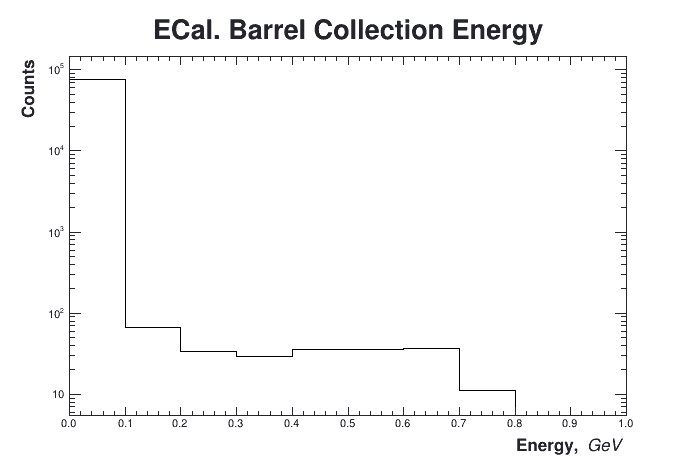

In [5]:
# %jsroot on
c = rt.TCanvas()
h = df.Histo1D(("h1", "ECal. Barrel Collection Energy;#bf{Energy,} #it{GeV};#bf{Counts}", 10, 0, 1), 
               "ECalBarrelCollection.energy")
h.Draw("")
c.SetLogy()
c.Draw()

How much of the total energy can you retain as a function of minimum energy threshold?

## New Histogram Loop
Trying to get this to work...

76686.0
67.0
34.0
29.0
36.0
36.0
37.0
11.0
0.0
67.0
34.0
29.0
36.0
36.0
37.0
11.0
0.0
34.0
29.0
36.0
36.0
37.0
11.0
0.0
29.0
36.0
36.0
37.0
11.0
0.0
36.0
36.0
37.0
11.0
0.0
36.0
37.0
11.0
0.0
37.0
11.0
0.0
11.0
0.0
0.0


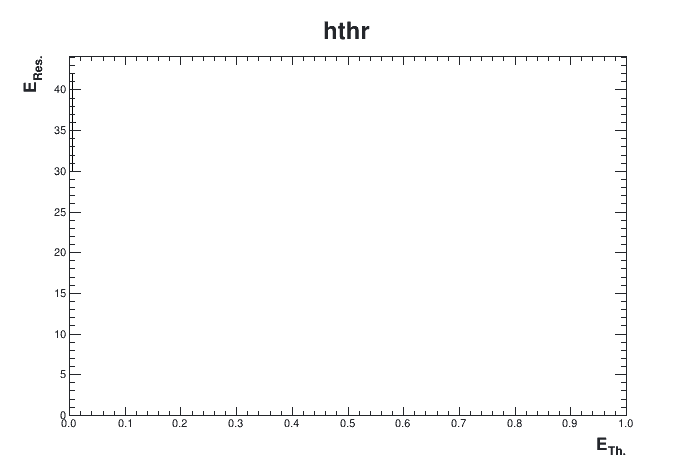

In [6]:
c = rt.TCanvas()
hthr = rt.TH1D('hthr', 'hthr', 100, 0, 1)
        
        
nbins = h.GetNbinsX()
maxbin = h.GetMaximumBin()*nbins
# print(nbins, maxbin)

# for bin in range(1, maxbin+1):
#     print(f"Bin {bin} content: {h.GetBinContent(bin)}")

step = maxbin/nbins
for ibin in range(1, maxbin+1):                 # For a bin i from 0 to the maximum bin number...
    for jbin in range(ibin, maxbin):            # and for a bin j from bin i to the maximum bin number...
        n = h.GetBinContent(jbin)               # get the total number of bin entries for j...
        if n != 0:                              # and if it has entries...
            E = h.Integral(jbin, jbin, "")/n    # calculate their total summed, weighted value...
            for entry in range(int(n)):         # and for each entry...
                hthr.Fill(entry, E)             # add it to a histogram, weighted by E.
        else:                                   # Otherwise...
            E = 0                               # there are no entries, so the value of the entries is 0.
            hthr.Fill(0, E)
        print(n)

hthr.GetYaxis().SetTitle("#bf{E_{Res.}}")
hthr.GetXaxis().SetTitle("#bf{E_{Th.}}")
hthr.Draw()
c.Draw()

## Numba with ROOT

Numba allows you to employ pythonic operations in ROOT C++. This is useful for defining new columns, which typically requires using C++ syntax (which I don't know well).

In [7]:
@rt.Numba.Declare(['float', 'int'], "float")    # Supply I/O types
def pypow(x, y):    # Declare functions
    return x**y

In [8]:
%%cpp
cout << "2^3 = " << Numba::pypow() << endl; # Call in C++

input_line_155:2:35: error: too few arguments to function call, expected 2, have 0
 cout << "2^3 = " << Numba::pypow() << endl; # Call in C++
                     ~~~~~~~~~~~~ ^
input_line_154:5:1: note: 'pypow' declared here
float pypow(float x_0, int x_1) {
^
input_line_155:2:46: error: expected expression
 cout << "2^3 = " << Numba::pypow() << endl; # Call in C++
                                             ^


In [9]:
@rt.Numba.Declare(['float', 'float'], "bool")
def isAboveThreshold(threshold, value):
    return value > threshold

@rt.Numba.Declare(['float', 'float'], "bool")
def isNotAboveThreshold(threshold, value):
    return value <= threshold

In [10]:
h = h.GetEntries()
print(h)

76936.0
